<a href="https://colab.research.google.com/github/hvhq/classificationp1/blob/master/SoftmaxRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from os import path

if not path.exists('gdrive'):
  from google.colab import drive
  drive.mount('gdrive')
import numpy as np
import pandas as pd
import json
import zipfile
import sklearn
import math
from google.colab import files
import requests
import matplotlib.pyplot as plt
from sklearn import preprocessing

Mounted at gdrive


In [3]:
import copy


In [4]:
!pip install ipython-autotime
%load_ext autotime
!pip install kaggle
!mkdir -p /root/.kaggle

time: 2.64 s


In [3]:
#upload kaggle token file: kaggle.json

##upload from local computer
#files.upload()

##from kaggle
#kaggletoken={"username":"huynhvanhien","key":"82d7e5f0d5f149aedf8f040ba7c74c2a"}
#with open('/root/.kaggle/kaggle.json', 'w')as kaggletokenfile:
#  json.dump(kaggletoken, kaggletokenfile)

##move to /.kaggle

##!cp kaggle.json /root/.kaggle/
#!chmod 600 /root/.kaggle/kaggle.json

time: 112 ms


['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


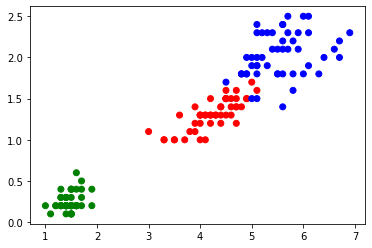

time: 463 ms


In [58]:
directory="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/"
data=pd.read_csv(directory+"/iris.data", header=None)
data.columns=['sepal_l', 'sepal_w', 'petal_l', 'petal_w', 'species']
#print(data)
#names=requests.get(directory+'iris.names', {}).text
#print(names)


visual_data=data.filter(['petal_l', 'petal_w', 'species'], axis=1)
col_color=[]
for i in range(len(visual_data)):
  if visual_data['species'][i]=='Iris-setosa':
    col_color.append('green')
  elif visual_data['species'][i]=='Iris-versicolor':
    col_color.append('red')
  else:
    col_color.append('blue')
plt.scatter(visual_data['petal_l'], visual_data['petal_w'], 
            c=col_color)

drop_column='species'
output_columns=[]
for i in data[drop_column]:
  if i not in output_columns:
    output_columns.append(i)
print(output_columns)


In [108]:
#convert data
#encoder string to numeric
encoder=sklearn.preprocessing.LabelEncoder()
encoder.fit(data.species)
data.species=encoder.transform(data.species)
#data.species=encoder.inverse_transform(data.species)
data['biascol']=pd.Series([int(1) for i in range(len(data))])
lendata=len(data)

#create vector0, base vector, for multiple time of copy
num_class=len(output_columns)
vector_result_form=[0 for i in range(num_class)]
#drop result column into a list of vectors
x=data.drop(drop_column, axis=1)
y=pd.DataFrame(columns=output_columns)
for i in range(len(data)):
  vtmp=vector_result_form*1
  vtmp[data[drop_column][i]]=1
  y=y.append(pd.DataFrame([vtmp], columns=output_columns), ignore_index=True)
#print(x)
#print(y)
#change domain to [0,1]
maxc2=max(x.iloc[:,2])
minc2=min(x.iloc[:,2])
maxc3=max(x.iloc[:,3])
minc3=min(x.iloc[:,3])
for i in range(0, len(x.columns)):
  if max(x.iloc[:,i])-min(x.iloc[:,i])!=0:
    x.iloc[:,i]=(x.iloc[:,i]-([min(x.iloc[:,i])]*lendata))/([max(x.iloc[:,i])-min(x.iloc[:,i])]*lendata)
  else:
    x.iloc[:,i]=1
#split train and test
trainOTestRate=3
xtrain=pd.DataFrame(columns=x.columns)
xtest=pd.DataFrame(columns=x.columns)
ytrain=pd.DataFrame(columns=output_columns)
ytest=pd.DataFrame(columns=output_columns)
for i in range(0, len(data)):
  if i%(trainOTestRate+1)==0:
    xtest=xtest.append(x.iloc[i], ignore_index=True)
    ytest=ytest.append(y.iloc[i], ignore_index=True)
  else:
    xtrain=xtrain.append(x.iloc[i], ignore_index=True)
    ytrain=ytrain.append(y.iloc[i], ignore_index=True)

#convert y to vector
#ytrain=ytrain.iloc[:,0]
#ytest=ytest.iloc[:,0]
lentrain=len(xtrain)
numberInputAttr=len(x.columns)
vector0=np.array([0]*numberInputAttr)
#xtrain=np.array(xtrain)
#xtest=np.array(xtest)
#print("xtrain:\n", xtrain)
#print("ytrain:\n", ytrain)
print("xtest:\n", xtest)
print("ytest:\n", ytest)


xtest:
      sepal_l   sepal_w   petal_l   petal_w  biascol
0   0.222222  0.625000  0.067797  0.041667      1.0
1   0.194444  0.666667  0.067797  0.041667      1.0
2   0.027778  0.375000  0.067797  0.041667      1.0
3   0.138889  0.416667  0.067797  0.000000      1.0
4   0.305556  0.791667  0.050847  0.125000      1.0
5   0.305556  0.583333  0.118644  0.041667      1.0
6   0.138889  0.583333  0.152542  0.041667      1.0
7   0.250000  0.583333  0.067797  0.041667      1.0
8   0.250000  0.875000  0.084746  0.000000      1.0
9   0.333333  0.625000  0.050847  0.041667      1.0
10  0.194444  0.625000  0.050847  0.083333      1.0
11  0.222222  0.750000  0.152542  0.125000      1.0
12  0.277778  0.708333  0.084746  0.041667      1.0
13  0.722222  0.458333  0.661017  0.583333      1.0
14  0.555556  0.541667  0.627119  0.625000      1.0
15  0.194444  0.000000  0.423729  0.375000      1.0
16  0.361111  0.375000  0.440678  0.500000      1.0
17  0.527778  0.083333  0.593220  0.583333      1.0
18  

In [ ]:
#stochatic gradient descent
#n-params-dimensions
n=len(x.columns) # one more for bias
vector0=[0 for i in range(n)]

wt=[]
for i in range(num_class):
  wt.append(vector0*1)
convergent_limit=0.005
maxloop=1000
iloop=0
#loop till convergent
while iloop < maxloop:
  wtmp=copy.deepcopy(wt)
  for c in range(num_class):
    deltaJ=vector0*1
    #update theta
    for i in range(lentrain):
      tmp=[math.exp(np.dot(wt[cs],xtrain.iloc[i])) for cs in range(num_class)]
      tmp=[it/sum(tmp) for it in tmp]
      deltaJ=np.add(deltaJ, ((ytrain.iloc[i][c]==1)-tmp[c])*xtrain.iloc[i])
    deltaJ=[it/lentrain for it in deltaJ]
    wt[c]=np.add(wt[c], deltaJ)
  #check if convergent
  is_convergent=abs(np.subtract(wt, wtmp)) < convergent_limit
  if all([all(is_convergent[i]) for i in range(num_class)]):
    break
  iloop+=1
print(wt)
print(iloop)

In [85]:
#test
num_errors=0
ycal=pd.DataFrame(columns=output_columns)
for i in range(len(xtest)):
  tmp=[math.exp(np.dot(wt[cs],xtest.iloc[i])) for cs in range(num_class)]
  print(tmp)
  tmp=[it/sum(tmp) for it in tmp]
  vtmp=vector_result_form*1
  vtmp[tmp.index(max(tmp))]=1
  ycal=ycal.append(pd.DataFrame([vtmp], columns=output_columns), ignore_index=True)
  #print(ycal.iloc[i])
  #print(ycal.iloc[i])
  if(any([ycal.iloc[i][it]!=ytest.iloc[i][it] for it in range(num_class)])):
    num_errors+=1
print('accuracy: ',1-num_errors/len(xtest))


[469.20169625100056, 8.468470831745524, 0.0003802556026819864]
[627.4824529831144, 7.713904043000186, 0.0003132675085059188]
[222.8082403965358, 9.111847432687977, 0.0007059365559767507]
[261.5171241332829, 10.894396208348207, 0.0005095144820188304]
[586.3421647756019, 6.356918866305341, 0.000420051879446635]
[218.87914819448062, 10.20162688457741, 0.0006801190521257961]
[280.82095904717545, 8.247394742401225, 0.0006479421722950713]
[350.8468335938313, 9.296848629223096, 0.0004615682106984574]
[1816.8491513730582, 6.884506014335097, 0.00012531829287120534]
[383.584073785735, 9.777809338490005, 0.0004062325358268068]
[437.0525882177861, 7.449276153229295, 0.0004636855632961023]
[315.6271170130741, 6.228204323160333, 0.0007920697327980601]
[554.9464361813791, 8.210863492372347, 0.0003376399958806938]
[0.04507924057973168, 8.511060419677989, 4.35864215454054]
[0.10515763912828739, 5.5188183814862874, 2.8751106542492897]
[0.29030719779086384, 10.85637103081175, 0.45947440655459115]
[0.5265

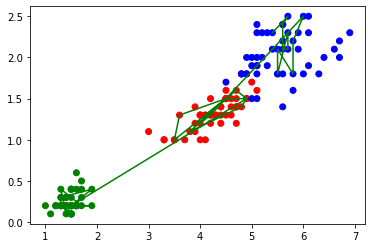

time: 193 ms


In [111]:
#visualize_weight
#visual_data=data.filter(['petal_l', 'petal_w', 'species'], axis=1)
#col_color=[]
#for i in range(len(visual_data)):
#  if visual_data['species'][i]=='Iris-setosa':
#    col_color.append('green')
#  elif visual_data['species'][i]=='Iris-versicolor':
#    col_color.append('red')
#  else:
#    col_color.append('blue')
plt.scatter(visual_data['petal_l'], visual_data['petal_w'], c=col_color)
#print(xtest.iloc[0][2].dtype)
line1x=[xtest.iloc[i][2]*(maxc2-minc2)+minc2 for i in range(len(xtest))]
line1y=[xtest.iloc[i][3]*(maxc3-minc3)+minc3 for i in range(len(xtest))]
#print(line1x)
#print(line1y)
plt.plot(line1x, line1y, label='something', color='green')
